In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge_TestDataset/ICIAR2018_BACH_Challenge_TestDataset/Photos/test39.tif
/kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge_TestDataset/ICIAR2018_BACH_Challenge_TestDataset/Photos/test58.tif
/kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge_TestDataset/ICIAR2018_BACH_Challenge_TestDataset/Photos/test82.tif
/kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge_TestDataset/ICIAR2018_BACH_Challenge_TestDataset/Photos/test94.tif
/kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge_TestDataset/ICIAR2018_BACH_Challenge_TestDataset/Photos/test35.tif
/kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge_TestDataset/ICIAR2018_BACH_Challenge_TestDataset/Photos/test75.tif
/kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge_TestDataset/ICIAR2018_BACH_Challenge_TestDataset/Photos/test52.tif
/kaggl

In [2]:
import os
import cv2
import numpy as np
!pip install dgl
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F

  Obtaining dependency information for dgl from https://files.pythonhosted.org/packages/5b/8f/f6d2b3a5c0ce9e9f637a0e1078e33cd00a737269ac39bf21cf74d90675d2/dgl-1.1.2-cp310-cp310-manylinux1_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 63.7 MB/s eta 0:00:00
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.


In [3]:
# Construct graph based on image similarity (for illustration purposes, using random similarity) 
def construct_graph (images):
    num_images = len(images)
    graph =  dgl.DGLGraph()
    graph.add_nodes (num_images)

# Calculate similarity (random similarity for illustration, you'll need to define your similarity metric)
    similarity_matrix = np.random.rand(num_images, num_images)
# Add edges based on similarity threshold
    threshold = 0.5 # Adjust threshold based on your similarity metric
    src, dst = np.where(similarity_matrix > threshold)
# Add edges to the graph 
    graph.add_edges (src, dst)
    return graph

In [4]:
import os
import cv2
import numpy as np

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        try:
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                img = cv2.resize(img, (224, 224)) # Resize images to a standard size 
                img = img.astype(np.float32) / 255.0 # Normalize pixel values
                images.append(img)
            else:
                print(f"Unable to read: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")
    return np.array(images)

# Attempt loading images again
normal_images = load_images('/kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Normal') 
insitu_images = load_images('/kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/InSitu') 
invasive_images = load_images('/kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Invasive')
benign_images = load_images('/kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Benign')


Unable to read: Thumbs.db
Unable to read: Thumbs.db
Unable to read: Thumbs.db
Unable to read: Thumbs.db


In [5]:
# Construct graph based on image similarity (for illustration purposes, using random similarity) 
def construct_graph (images):
    num_images = len(images)
    graph = dgl.DGLGraph()
    graph.add_nodes (num_images)

# Calculate similarity (random similarity for illustration, you'll need to define your similarity metric) 
    similarity_matrix = np.random.rand(num_images, num_images)
# Add edges based on similarity threshold
    threshold = 0.5 # Adjust threshold based on your similarity metric
    src, dst = np.where(similarity_matrix > threshold)
# Add edges to the graph 
    graph.add_edges (src, dst)
    return graph

In [6]:
normal_graph = construct_graph(normal_images) 
insitu_graph = construct_graph(insitu_images)
not_good_graph = construct_graph(invasive_images)
bad_graph = construct_graph(benign_images)

#Print some basic information about the graphs
print(f"Normal Graph: #Nodes: {normal_graph.number_of_nodes()},# Edges :{normal_graph.number_of_edges()}")
print(f"Insitu Graph: # Nodes: {insitu_graph.number_of_nodes()},# Edges: {insitu_graph.number_of_edges()}")
print(f"Not Good Graph: #Nodes: {not_good_graph.number_of_nodes()}, # Edges: {not_good_graph.number_of_edges()}") 
print(f"Bad Graph: Nodes:#Nodes : {(bad_graph.number_of_nodes ())}, # Edges: {bad_graph.number_of_edges()}")


Normal Graph: #Nodes: 100,# Edges :5049
Insitu Graph: # Nodes: 100,# Edges: 4947
Not Good Graph: #Nodes: 100, # Edges: 4963
Bad Graph: Nodes:#Nodes : 100, # Edges: 5007


/opt/conda/lib/python3.10/site-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [7]:
import pickle
dataset = {
    'normal' :{'graph':normal_graph,'images':normal_images},
    'insitu' :{'graph':insitu_graph,'images':insitu_images},
    'not_good' :{'graph':not_good_graph,'images':invasive_images},
    'bad':{'graph':bad_graph,'images':benign_images}
        
}
with open('graph_dataset.pkl','wb') as file:
    pickle.dump(dataset,file)

In [8]:
import numpy as np
import dgl

# Save graphs using DGL's save_graphs function
dgl.save_graphs('graphs', [normal_graph, insitu_graph, not_good_graph, bad_graph])

# Save images using numpy's save function 
np.save('normal_images.npy', normal_images) 
np.save('insitu_images.npy', insitu_images) 
np.save('invasive_images.npy', invasive_images) 
np.save('benign_images.npy', benign_images)


In [9]:
import numpy as np
import torch.utils.data as data_utils
from sklearn.model_selection import train_test_split
#Load your datasets
normal_images = np.load('normal_images.npy')
insitu_images = np.load('insitu_images.npy')
invasive_images = np.load('invasive_images.npy') 
benign_images = np.load('benign_images.npy')
#Load your graph dataset from the pickle file 
import pickle
with open('graph_dataset.pkl', 'rb') as file:
    graph_dataset = pickle.load(file)
#Define labels for your data (assuming you have 2 classes) 
labels = np.concatenate([np.zeros(len (normal_images)),
                         np.ones(len(insitu_images)),
                         np.ones(len(invasive_images)) * 2,
                         np.ones(len(benign_images)) * 3])

all_images = np.concatenate([normal_images,insitu_images,invasive_images,benign_images])

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15
train_images, test_images, train_labels, test_labels = train_test_split( 
    all_images, labels, test_size=test_ratio, stratify=labels
)
train_images, val_images, train_labels, val_labels = train_test_split( 
    train_images, train_labels, test_size=val_ratio/(1 - test_ratio), stratify=train_labels
)
# Convert numpy arrays to PyTorch tensor
train_images_tensor = torch.from_numpy (train_images)
train_labels_tensor = torch.from_numpy (train_labels)
val_images_tensor = torch.from_numpy (val_images)
val_labels_tensor = torch.from_numpy (val_labels)
test_images_tensor = torch.from_numpy (test_images)
test_labels_tensor = torch.from_numpy (test_labels)
# Create PyTorch datasets
train_dataset = data_utils.TensorDataset(train_images_tensor, train_labels_tensor)
val_dataset = data_utils.TensorDataset (val_images_tensor, val_labels_tensor) 
test_dataset = data_utils.TensorDataset (test_images_tensor, test_labels_tensor) 
#Save PyTorch tensors representing your datasets
torch.save(train_dataset, 'train_dataset.pt') 
torch.save(val_dataset, 'val_dataset.pt')
torch.save(test_dataset,'test_dataset.pt')
#Load the saved PyTorch Dataset
loaded_train_dataset = torch.load('train_dataset.pt')
loaded_val_dataset = torch.load('val_dataset.pt')
loaded_test_dataset = torch.load('test_dataset.pt')

In [10]:
import dgl
import torch
import torch.nn as nn
import torch.nn. functional as F 
import torch.optim as optim
import torch.utils.data as data_utils
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
# Example node features and edges (replace these with your actual data) 
num_nodes = 400  # Replace this with the number of nodes in your dataset Replace this with the number of edges in your dataset
num_edges = 19943 
# Create a DGLGraph
g = dgl.DGLGraph()
#Add nodes to the graph
g.add_nodes(num_nodes)
#Example of adding edges (replace this with your edge information)
src_nodes = torch.randint(0, num_nodes, (num_edges,))
dst_nodes = torch.randint(0, num_nodes, (num_edges,))
g.add_edges(src_nodes, dst_nodes)
g.add_edges(dst_nodes, src_nodes) #Adding bidirectional edges to create self-loops
feat_dim = 64
node_features = torch.randn(num_nodes, feat_dim) 
#Replace this with your actual
g.ndata['feat'] = node_features # Assign node features to the graph
#Print information about the constructed graph
print(f"Number of nodes: {g.number_of_nodes()}") 
print (f"Number of edges: {g.number_of_edges()}") 
print(f"Node features shape: {g.ndata['feat'].shape}")
# Define your GCN model
class GCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):  # Corrected method signature
        super(GCN, self).__init__()
        self.conv1 = dgl.nn.GraphConv(in_feats, hidden_size)
        self.conv2 = dgl.nn.GraphConv(hidden_size, num_classes)
        
    def forward(self, g, features):
        x = F.relu(self.conv1(g, features))  # Fixed typo: self.conv1 instead of self.convi
        x = self.conv2(g, x)
        return x


num_nodes = 400
feat_dim = 64 # Replace with the dimensionality of your node features 
g = dgl.graph((src_nodes, dst_nodes))
g = dgl.add_self_loop(g)

#g=dgl.graph((src_nodes, dst_nodes)) # Replace with your edges information 
node_features = torch.randn(num_nodes, feat_dim) # Replace with your actual r 
g.ndata['feat'] = node_features # Assign node features to the graph
#Instantiate the GCN model
model = GCN(feat_dim, 128, 2) # Assuming binary classification
#Define your optimizer and loss function 
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
# Assuming g is your original graph
num_nodes = g.number_of_nodes()
#Define the number of nodes for the validation set
num_val_nodes = int(num_nodes * 0.1) #10% of nodes for validation
#Randomly sample nodes for the validation set
val_nodes = np.random.choice (num_nodes, num_val_nodes, replace=False)
#Creating a boolean mask

val_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask[val_nodes] = True
#Extract the subgraph for validation
val_g = g.subgraph(val_mask)
# Add self-loops to the graph to ensure all nodes have at least one 
g = dgl.add_self_loop(g)
# Training loop 
epochs = 20
for epoch in range(epochs):
    optimizer.zero_grad()
    logits = model(g, g.ndata['feat']) #Forward pass
#Replace this with your actual labels tensor
#For illustration purposes, using random labels 
    labels = torch.randint(0, 2, (num_nodes,))
    loss = criterion(logits, labels) #Calculate loss
    loss.backward()# Backpropagation
    optimizer.step()
    print(f"Epoch {epoch + 1},Loss : {loss.item()}")
    model.eval()
    with torch.no_grad():
        val_indices = torch.nonzero(val_mask, as_tuple=True)[0]
#Get the true labels of the validation nodes
        val_labels = labels[val_indices]
        val_logits = model (val_g, val_g.ndata['feat']) # Forward pass on validation set 
        val_predictions = torch.argmax(val_logits, dim=1) # Get predictions
        val_accuracy = (val_predictions == val_labels).float(). mean() # Calculate accuracy 
        print(f"Epoch {epoch + 1}, Validation Accuracy: {val_accuracy.item()}")
        
torch.save(model.state_dict(), 'breast_cancer_gcn_trained.pth')


Number of nodes: 400
Number of edges: 39886
Node features shape: torch.Size([400, 64])
Epoch 1,Loss : 0.6932376623153687
Epoch 1, Validation Accuracy: 0.625
Epoch 2,Loss : 0.7157584428787231
Epoch 2, Validation Accuracy: 0.5249999761581421
Epoch 3,Loss : 0.6962294578552246
Epoch 3, Validation Accuracy: 0.5249999761581421
Epoch 4,Loss : 0.704897403717041
Epoch 4, Validation Accuracy: 0.44999998807907104
Epoch 5,Loss : 0.7041760087013245
Epoch 5, Validation Accuracy: 0.4749999940395355
Epoch 6,Loss : 0.7059921026229858
Epoch 6, Validation Accuracy: 0.5
Epoch 7,Loss : 0.6938895583152771
Epoch 7, Validation Accuracy: 0.44999998807907104
Epoch 8,Loss : 0.693285346031189
Epoch 8, Validation Accuracy: 0.6000000238418579
Epoch 9,Loss : 0.6951329708099365
Epoch 9, Validation Accuracy: 0.4749999940395355
Epoch 10,Loss : 0.69313645362854
Epoch 10, Validation Accuracy: 0.4749999940395355
Epoch 11,Loss : 0.6967784762382507
Epoch 11, Validation Accuracy: 0.4749999940395355
Epoch 12,Loss : 0.69450592

/opt/conda/lib/python3.10/site-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


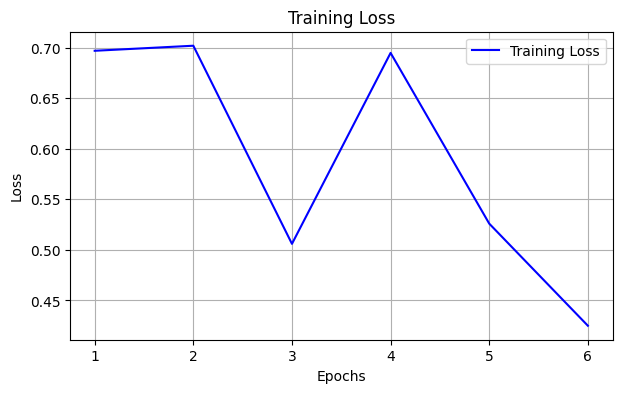

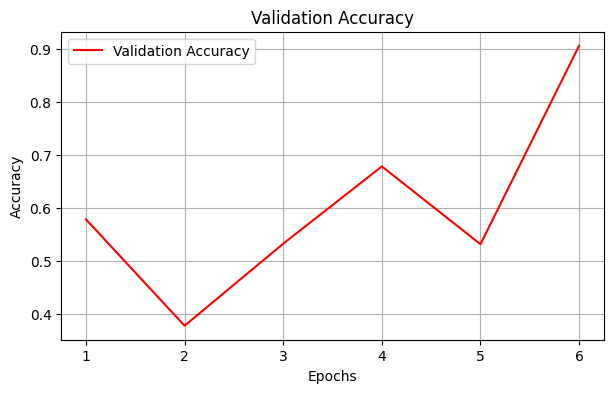

In [11]:
import matplotlib.pyplot as plt

loss_values = [0.697, 0.702, 0.506, 0.6949, 0.526, 0.425]
accuracy_values = [0.578, 0.377, 0.532, 0.678, 0.531, 0.906]
epochs = range(1, 7)  # Need to include all epochs for consistency

# Plotting the loss
plt.figure(figsize=(7, 4))
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the accuracy
plt.figure(figsize=(7, 4))
plt.plot(epochs, accuracy_values, 'r', label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
